# Template Tutorial

This demo will give a short tutorial about the new feature of ESPPy - Template, and a group of short examples will be given to show the functionalities of `Template`.

In [1]:
import esppy
esp = esppy.ESP('http://lax95d01.unx.sas.com:40012')
proj = esp.create_project('template_tutorial')

In [2]:
# check template list first

esp.Template.template_list

defaultdict(dict,
            {'KeypointsDetection': {'description': 'The KeypointsDetection Template contains THERE essential windows for keypoints detection: a Calculate Window for image processing, a ModelReader Window to import pretrained astore, and a Score Window.',
              'required_parameter_map': defaultdict(list,
                          {'astore': ['w_reader.reference'],
                           'device_index': ['w_reader.DEVICE0'],
                           'enable_gpu': ['w_reader.usegpuesp']})},
             'Logistic': {'description': 'The Logistic Template contains TWO essential windows for the logistic regression model: a Train Window, and a Score Window.',
              'required_parameter_map': defaultdict(list,
                          {'target': ['w_train_logis.target'],
                           'nInit': ['w_train_logis.nInit'],
                           'commitInterval': ['w_train_logis.commitInterval'],
                           'numC': ['w_train_l

### Easy Initialization with A Single Line of Code
Suppose that we want to conduct a text analysis project, we can apply the TextEmbeddding template

In [3]:
# simple initialization with a single line of code

t1 = esp.Template.TextEmbedding('t1')

In [4]:
# check windows in the template

t1.windows

{'w_join': JoinWindow(name='t1_w_join', contquery=None, project=None), 'w_tok': CalculateWindow(name='t1_w_tok', contquery=None, project=None), 'w_vec': CalculateWindow(name='t1_w_vec', contquery=None, project=None)}

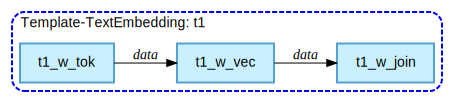

In [5]:
t1.to_graph(detail=True)

### Support both Easy and Advanced Parameter Settings
The example we showed earlier is a simple initialization of a template by adopting the default parameter settings.
For advanced users who are capable of overriding the parameters for each window, we offer the following different options:
1. Set method in Window object
2. Set method in Template object
2. Initialization method in Template object


In [6]:
# Option 1
# set_parameter method in a Window object

t1 = esp.Template.TextEmbedding('t1')
t1.windows['w_vec'].set_parameters(wordVec="1.txt", startList='aaa')
t1.windows['w_vec'].parameters

{'outputDocVec': '1',
 'startList': 'aaa',
 'stopList': '/u/shhuna/bigdisk/stop-words.txt',
 'wordVec': '1.txt',
 'wordVecDelimiter': 'SPACE',
 'wordVecLineBreak': 'LF'}

In [7]:
# Option 2
# set_parameter method in a Template object

t1 = esp.Template.TextEmbedding('t1')
t1.set_parameters('w_vec', wordVec="2.txt")
t1.windows['w_vec'].parameters

{'outputDocVec': '1',
 'startList': '/u/shhuna/bigdisk/pos_neg_words.txt',
 'stopList': '/u/shhuna/bigdisk/stop-words.txt',
 'wordVec': '2.txt',
 'wordVecDelimiter': 'SPACE',
 'wordVecLineBreak': 'LF'}

In [8]:
# Option 3
# Initialization method in a Template object 

t1 = esp.Template.TextEmbedding('t1', wordVec="3.txt")
t1.windows['w_vec'].parameters

{'outputDocVec': '1',
 'startList': '/u/shhuna/bigdisk/pos_neg_words.txt',
 'stopList': '/u/shhuna/bigdisk/stop-words.txt',
 'wordVec': '3.txt',
 'wordVecDelimiter': 'SPACE',
 'wordVecLineBreak': 'LF'}

In [9]:
t1.required_parameter_map

defaultdict(list,
            {'startList': ['w_vec.startList'],
             'stopList': ['w_vec.stopList'],
             'wordVec': ['w_vec.wordVec'],
             'wordVecDelimiter': ['w_vec.wordVecDelimiter']})

### Flexible connection among windows and templates
Template also support flexible connection between Window and Template objects:
1. Window -> Template 
2. Template -> Window
3. Template -> Template


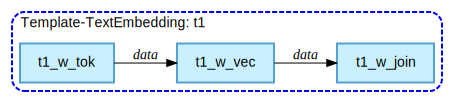

In [11]:
t1.to_graph(detail=True)

In [12]:
# Check input and output windows in the template

t1.input_windows, t1.output_windows

('w_tok', 'w_join')

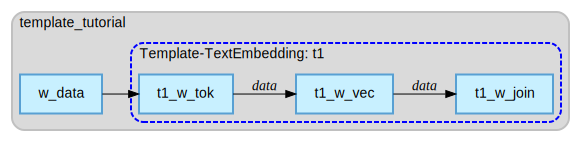

In [13]:
# Define a source window

src = esp.SourceWindow("w_data", schema=('id*:int64', 'content:string', 'sentiment:string'),
                       index_type='empty', insert_only=True, autogen_key=True)

##################################
# window --> template
##################################

# Here, the first input_windows of template t1 will be added to the target set of window src
src.add_target(t1)


# add to project
proj.add_window(src)
proj.add_template(t1)
proj.to_graph(template_detail=True)

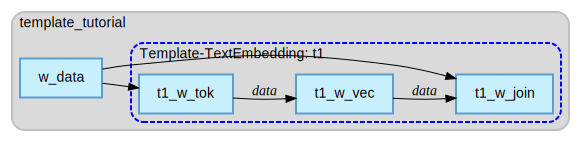

In [14]:
##################################
# window --> template.window
##################################

src.add_target(t1.windows['w_join'])
proj.to_graph(template_detail=True)

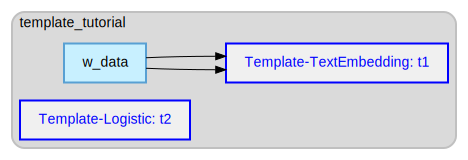

In [15]:
# Initialize a new template t2

t2 = esp.Template.Logistic('t2')
proj.add_template(t2)
proj

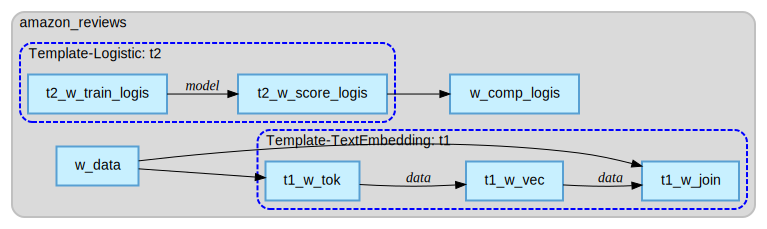

In [17]:
# Define a compute window for Logistic Regression

comp_logis = esp.ComputeWindow("w_comp_logis", 
                               schema=['id*:int64', 'sentiment:string',
                                       'predicted_y:double', 'p_1:double', 'p_0:double'])

##################################
# Template --> Window
##################################

# Here, the window comp_logis will be added to the target set of 
# the first output_windows of template t2
t2.add_target(comp_logis)

proj.add_window(comp_logis)
proj.to_graph(template_detail=True)

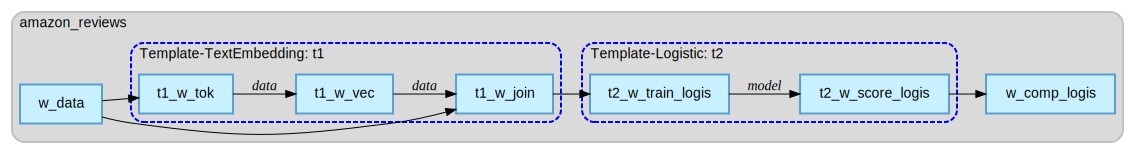

In [18]:
##################################
# Template --> Template
##################################

# By default, the first input_windows of template t2 will be added to the target set of 
# the first output_windows of template t1
t1.add_target(t2)
proj

### Support Read and Write through XML Files

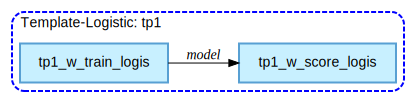

In [20]:
# Read builtin template file

tp1 = esp.Template.Logistic('tp1')
tp1

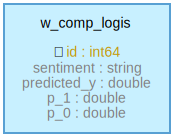

In [21]:
comp_logis

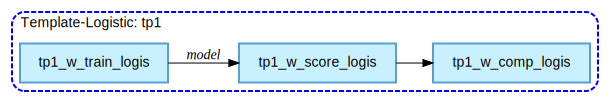

In [22]:
# Add the window comp_logis to current template

tp1.add_window(comp_logis)
tp1.add_target(comp_logis)
tp1

In [23]:
# Save the customized template to a xml file

tp1.save_xml('new_logis.xml')

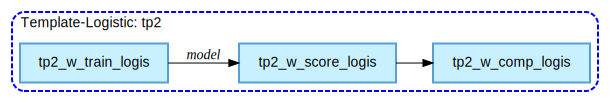

In [24]:
# Load a template from the customized xml file

tp2 = esp.Template.from_xml('new_logis.xml', 'tp2')
tp2

In [25]:
print(tp2.to_xml(pretty=True))

<template-Logistic input-windows="w_train_logis,w_score_logis" output-windows="w_score_logis">
  <description>sample description</description>
  <windows>
    <window-compute name="w_comp_logis">
      <schema>
        <fields>
          <field key="true" name="id" type="int64" />
          <field key="false" name="sentiment" type="string" />
          <field key="false" name="predicted_y" type="double" />
          <field key="false" name="p_1" type="double" />
          <field key="false" name="p_0" type="double" />
        </fields>
      </schema>
      <output />
    </window-compute>
    <window-score name="w_score_logis">
      <schema>
        <fields>
          <field key="true" name="id" type="int64" />
          <field key="false" name="content" type="string" />
          <field key="false" name="sentiment" type="string" />
          <field key="false" name="vector" type="array(dbl)" />
          <field key="false" name="predicted_y" type="double" />
          <field key="fa